# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
# print(json.dumps(btc_data, indent=4))
btc_value = btc_data['data']['1']['quotes']['USD']['price']
# print(btc_value)

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
# print(json.dumps(eth_data, indent=4))
eth_value = eth_data['data']['1027']['quotes']['USD']['price']
# print(eth_value)

# Compute current value of my crpto
my_btc_value = my_btc*btc_value
my_eth_value = my_eth*eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56593.20
The current value of your 5.3 ETH is $7868.86


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
base_url = 'https://paper-api.alpaca.markets'
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url,
    api_version="v2"
)
alpaca

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-02-26", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-02-26 00:00:00-05:00  114.96  115.39  114.5915  115.37  9735524  384.35   

                                                              
                             high     low   close     volume  
time                                                          
2021-02-26 00:00:00-05:00  385.58  378.23  380.32  134902084

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.37
Current SPY closing price: $380.32


In [10]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19016.00
The current value of your 200 AGG shares is $23074.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_value = my_btc_value+my_eth_value
shares_value = my_agg_value+my_spy_value
value_data = {
    "amount": [crypto_value, shares_value]
}

df_savings = pd.DataFrame(value_data, index=['crypto','shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,64462.057
shares,42090.000


<AxesSubplot:ylabel='amount'>

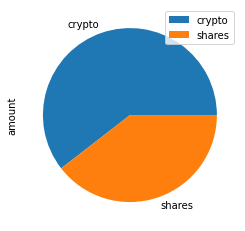

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value+shares_value

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! Your savings are more than enough in case of an emergency!")
elif total_savings == emergency_fund:
    print(f"Congratulations! You're covered in case of an emergency!")
else:
    print(f"Darn! You're still ${emergency_fund-total_savings} away from covering an emergency.")

Congratulations! Your savings are more than enough in case of an emergency!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [44]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-02-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-02-26', tz='America/New_York').isoformat()

In [50]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2020-10-05 00:00:00-04:00  117.74  117.74  117.5200  117.520  4343747  336.06   
2020-10-06 00:00:00-04:00  117.60  117.84  117.4900  117.610  3973998  339.92   
2020-10-07 00:00:00-04:00  117.53  117.66  117.4515  117.530  3867168  338.12   
2020-10-08 00:00:00-04:00  117.67  117.71  117.5900  117.690  3561383  342.85   
2020-10-09 00:00:00-04:00  117.65  117.74  117.5000  117.705  2750029  345.56   

                                                             
                             high     low   close    volume  
time                                                         
2020-10-05 00:00:00-04:00  339.96  336.01  339.73  38510456  
2020-10-06 00:00:00-04:00  342.17  334.38  334.94  74231873  
2020-10-07 00:00:00-04:00  341.63  338.09  340.73  40579189  
2020-10-08 00:00:00-04:00  343.85  341.86  343.73  35831859  
2020-10-09 00:00:00-04:00  347.35  344.89  346.84  45969566

In [83]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [84]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2020-10-05 00:00:00-04:00  117.74  117.74  117.5200  117.520  4343747   
2020-10-06 00:00:00-04:00  117.60  117.84  117.4900  117.610  3973998   
2020-10-07 00:00:00-04:00  117.53  117.66  117.4515  117.530  3867168   
2020-10-08 00:00:00-04:00  117.67  117.71  117.5900  117.690  3561383   
2020-10-09 00:00:00-04:00  117.65  117.74  117.5000  117.705  2750029   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2020-10-05 00:00:00-04:00          NaN  336.06  339.96  336.01  339.73   
2020-10-06 00:00:00-04:00     0.000766  339.92  342.17  334.38  334.94   
2020-10-07 00:00:00-04:00    -0.000680  338.12  341.63  338.09  340.73   
2020-10-08 00:00:00-04:00     0.001361  342.85  343.85  341.86  343.73   
2020-10-09 00:00:00-04:00     0.000127  345.56  347.35  344.89  346.84   

                                                  
                             volume daily_return  
time                                              
2020-10-05 00:00:00-04:00  38510456          NaN  
2020-10-06 00:00:00-04:00  74231873    -0.014099  
2020-10-07 00:00:00-04:00  40579189     0.017287  
2020-10-08 00:00:00-04:00  35831859     0.008805  
2020-10-09 00:00:00-04:00  45969566     0.009048

In [85]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002004,0.993830,0.996519,1.000882,1.010810,1.002185,1.004968,0.989352,1.001037,1.010588,...,0.995310,0.998245,1.005375,0.998326,0.998315,0.996368,0.995244,1.003282,0.995339,0.994644
2,1.002185,0.998659,0.988535,0.998279,1.008172,0.999642,0.986057,0.989240,0.997753,1.011373,...,0.997788,1.004543,1.007006,1.001105,1.003229,0.996782,0.999116,1.001820,0.996652,1.000362
3,0.996509,0.998617,0.984526,0.999268,1.007019,0.990700,0.986650,0.978221,1.001613,1.003371,...,1.001707,1.006770,1.008377,0.996589,1.003803,1.006523,1.002905,1.003939,0.990588,0.988999
4,1.004751,0.999397,0.989161,1.000247,1.011109,0.991967,0.988234,0.972839,0.993444,1.014131,...,0.994652,1.009723,1.009552,0.989022,1.011039,1.010121,1.010388,1.003302,0.988866,0.996872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,70.135497,165.657830,233.293916,86.185328,143.456855,86.302593,208.271670,181.327055,110.114405,95.391863,...,155.930009,55.385177,58.268072,189.665965,87.335779,61.488692,197.222509,69.383962,58.339184,211.245444
7557,70.679969,165.056475,237.247858,85.907308,143.666793,86.337320,207.956876,181.394974,111.135318,94.218841,...,155.507962,55.246175,58.090833,190.040002,87.063720,62.284147,197.563650,69.264532,58.652151,210.663309
7558,71.143885,166.350255,235.611694,86.274509,144.314753,86.457961,210.763270,180.374994,112.826033,92.723751,...,154.211403,55.012469,57.618546,189.653004,88.064613,61.873114,197.447290,69.450674,57.707322,211.689646
7559,70.585517,167.744941,235.949956,86.796941,144.314737,87.454503,211.691810,181.130480,113.772650,93.903819,...,154.683345,55.359214,57.538238,189.306556,88.332536,62.217676,197.391657,69.290110,58.120779,211.814768


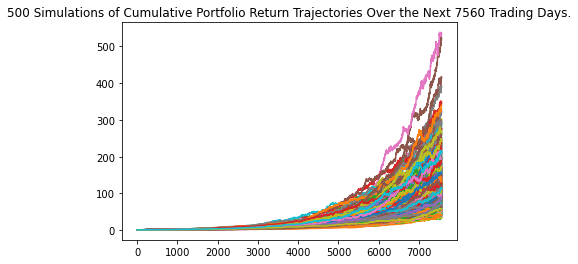

In [86]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

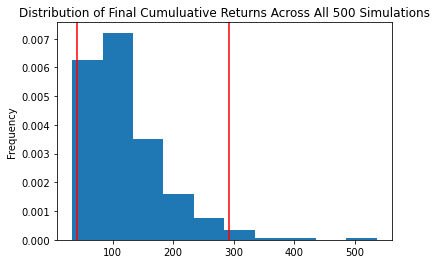

In [87]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean            122.495100
std              67.824498
min              33.306800
25%              73.988069
50%             107.064838
75%             152.562774
max             535.330941
95% CI Lower     41.332921
95% CI Upper    291.398082
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [89]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $826658.41 and $5827961.64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [90]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1239987.62 and $8741942.46


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [103]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [104]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992048,0.989657,1.014828,1.000064,1.000669,0.995323,1.010087,0.999901,0.994785,1.011459,...,1.004281,1.007708,0.993856,1.010991,0.999643,1.009098,1.001082,1.002716,0.995230,0.990480
2,1.000069,1.005454,1.013656,0.995851,1.005816,0.995382,1.018994,1.002414,0.996221,1.009802,...,1.016239,1.008166,0.998069,1.000082,0.991384,1.006705,0.995932,1.008820,0.986003,0.985213
3,1.001974,1.005582,1.011562,1.007800,1.003408,0.996535,1.023335,1.012218,0.993324,0.999544,...,1.013338,1.004717,0.995219,0.980267,0.981959,1.007724,0.993958,1.010135,0.993499,0.992936
4,0.999005,1.009189,1.006597,1.012778,1.005619,0.991930,1.016384,1.005649,1.001623,0.996320,...,1.010565,1.007759,0.987934,0.979291,0.973225,1.011436,1.001241,1.012243,0.987942,0.984914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.948182,2.002777,1.881769,2.055119,1.165862,2.664186,2.680158,2.165872,2.427164,2.514880,...,2.109339,1.578083,1.893859,1.967791,1.586359,2.768654,2.271935,2.648634,2.659795,1.229105
1257,1.954021,1.956391,1.902067,2.041879,1.174125,2.642319,2.677106,2.160508,2.416300,2.506496,...,2.109893,1.577394,1.885813,1.978033,1.585909,2.768259,2.266404,2.655726,2.635740,1.218977
1258,1.947393,1.935206,1.890127,2.032350,1.169472,2.663676,2.667319,2.140928,2.444180,2.517108,...,2.126644,1.578423,1.889759,1.993294,1.598597,2.800276,2.270774,2.648231,2.624674,1.223145
1259,1.965788,1.939948,1.883403,2.061651,1.164499,2.650354,2.670699,2.122832,2.461805,2.520853,...,2.119185,1.580659,1.897831,2.011474,1.595354,2.788796,2.257328,2.662853,2.619252,1.220452


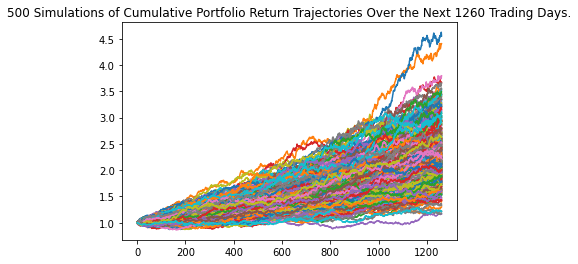

In [105]:
# Plot simulation outcomes
line_plot2 = MC_fiveyear.plot_simulation()

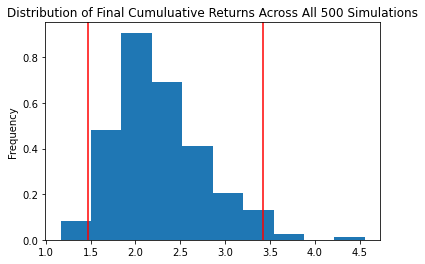

In [106]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_fiveyear.plot_distribution()

In [107]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2=MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           500.000000
mean              2.261365
std               0.503550
min               1.164723
25%               1.899523
50%               2.182762
75%               2.544623
max               4.555856
95% CI Lower      1.475460
95% CI Upper      3.425849
Name: 1260, dtype: float64


In [114]:
# Set initial investment
initial_investment_5yr=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl2[8]*initial_investment_5yr,2)
ci_upper_five = round(tbl2[9]*initial_investment_5yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $88527.58 and $205550.94


### Ten Years Retirement Option

In [109]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [110]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003288,1.008901,1.008653,1.002395,0.989392,1.003576,0.993492,0.999563,0.986739,1.002561,...,0.999029,1.001414,1.006417,1.012022,0.998179,0.996043,0.997823,0.992092,0.999369,1.003918
2,1.007771,1.012969,0.999213,1.006222,0.989708,0.991487,0.996837,0.996933,0.998297,1.001280,...,0.994782,0.996954,1.000295,1.019969,1.008995,1.001666,0.995078,0.986924,0.992198,1.010031
3,1.010851,1.015661,1.004906,1.007728,0.987947,0.981488,1.000875,1.000314,0.996095,1.008042,...,0.984856,1.011525,0.994687,1.033238,1.007708,0.997017,0.993839,0.980798,0.984803,1.007844
4,1.014865,1.008139,1.005417,1.004631,0.992781,0.985995,1.003013,0.997513,1.004573,0.999686,...,0.978979,1.015925,0.995753,1.031324,1.011967,0.991604,1.001904,0.979147,0.987679,1.015364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.437765,2.739747,3.931662,7.367311,2.964246,5.874267,3.574288,4.354798,5.553486,3.833031,...,3.832789,3.726324,3.974561,6.499964,4.604895,4.797454,5.614342,3.315332,2.928461,4.303524
2517,3.472377,2.704433,3.923248,7.349793,2.954414,5.897435,3.558476,4.342644,5.572435,3.818672,...,3.827870,3.729034,3.983193,6.501980,4.582383,4.811114,5.661858,3.275304,2.927361,4.335203
2518,3.481842,2.681471,3.925214,7.374293,2.949596,5.845209,3.556456,4.335001,5.577069,3.781965,...,3.832141,3.733764,4.023463,6.460141,4.591222,4.838730,5.673219,3.281523,2.945148,4.372972
2519,3.490826,2.661068,3.888788,7.444107,2.967400,5.857622,3.546350,4.323320,5.518665,3.767476,...,3.830437,3.741297,4.053472,6.491236,4.601965,4.834161,5.674837,3.287053,2.950195,4.361271


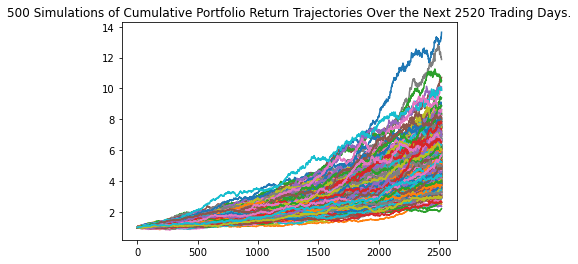

In [111]:
# Plot simulation outcomes
line_plot3 = MC_tenyear.plot_simulation()

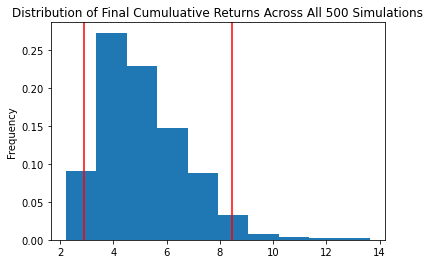

In [112]:
# Plot probability distribution and confidence intervals
dist_plot3 = MC_tenyear.plot_distribution()

In [113]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           500.000000
mean              5.108463
std               1.611597
min               2.207591
25%               3.911316
50%               4.756474
75%               6.093845
max              13.643187
95% CI Lower      2.889619
95% CI Upper      8.465921
Name: 2520, dtype: float64


In [116]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl3[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl3[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $173377.14 and $507955.25
